# Data Smoothing

### Less appropriate and more appropriate methods of data smoothing

These are demonstrated in terms of the flight of a bird or flock of birds who may intention during flight

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

in_array = np.linspace(-3, 4, 100) 

`piecewise` function constructed from two curves

In [2]:
def curve1(in_array_ ):
    return (in_array_**3) + ((in_array_*.9-4)**2)

def curve2(in_array_ ):
    return (20*np.sin((in_array_)*3+4)+20) + curve1(in_array_ )
    
x = in_array
curve = np.piecewise(x, [x<.2, x >=.2], [lambda x: curve1(x), lambda x: curve2(x)])  

In [3]:
flux_range = 35
random_flux = np.random.rand(len(curve))*flux_range - flux_range/2
noisy_data =  curve + random_flux
sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]

#### General purpose function for graphing two-dimensional data

In [34]:
def graph(x_array, y_array, custom_title, scatter=True, solid_line=False, line_viz = None):
    '''This function can accept basic x and y arrays for a basic 
    scatter plot or line plot (or both), but it can also accept, 
    in its line_viz parameter, a list of x, y array pairs.
    Its configuration for coloring, line weight, and dot size are 
    tailored specifically for the smoothing examples presented in 
    this blog.'''     
    # Set up the plotting
    figure_proportions = (10, 5)
    plt.figure(figsize=figure_proportions )    
    x_min, x_max = -3.3, 4.3
    y_max = 100
    y_axis_label = 'altitude (feet)'
    x_axis_label = 'time (seconds from arrival at target)'
    title = 'Trajectory of flight'
    custom_title = title + ' - ' + custom_title
    plt.title(custom_title)         
    dot_opacity = line_opacity = 1
    size = 30 if len(x_array) > 15 else 100 
    line_weight=1
    
    # Handle the cases where lines or curves are visualized, beyond the obvious
    if line_viz != None:
        if len(line_viz) == 1:
            colors = ['green']
        if len(line_viz) ==2:
            colors = ['lightseagreen', 'olive']
            dot_opacity = .3
            line_weight = 3
        if len(line_viz) == 4:
            dot_opacity = .1
            line_opacity = .1
            colors = ['turquoise', 'magenta','tomato', 'gold']           
        for i, (x, y) in enumerate(line_viz):
            plt.plot(x, y, color = colors[i], lw=line_weight)
    
    # Handle the standard cases
    if scatter:
        plt.scatter(x_array, y_array, color = 'green', marker = "o", alpha = dot_opacity, s=size) 
    if solid_line:
        plt.plot(x_array, y_array, color = 'green', alpha = line_opacity)

    # Present the plotting
    plt.xlabel(x_axis_label) 
    plt.ylabel(y_axis_label) 
    plt.xlim(x_min, x_max )
    plt.ylim(0, y_max )
    plt.savefig('viz/'+custom_title+'.svg')
    plt.show() 

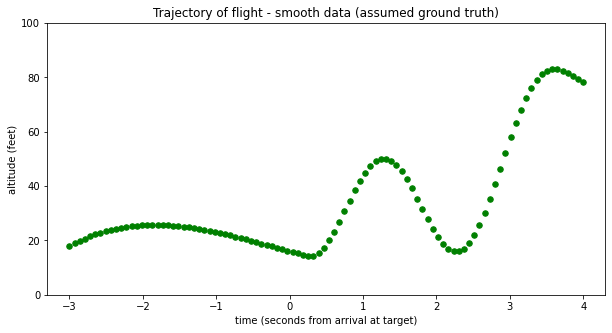

In [62]:
title_suffix = 'smooth data (assumed ground truth)'
graph(in_array, curve, title_suffix , scatter=True, solid_line=False)

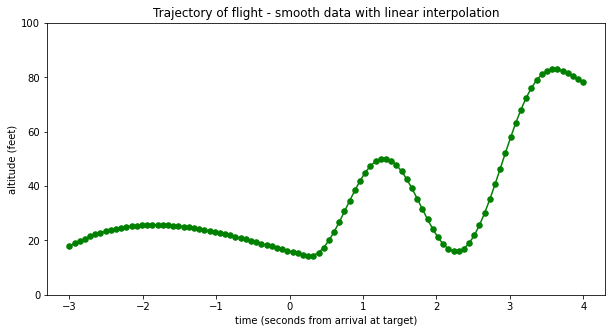

In [63]:
title_suffix = 'smooth data' + ' with linear interpolation'
graph(in_array, curve, title_suffix, scatter=True, solid_line=True)

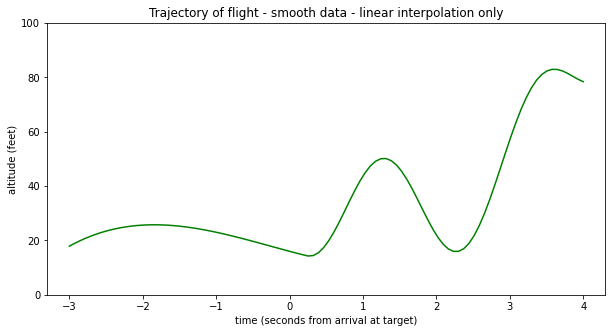

In [64]:
title_suffix = 'smooth data' + ' - linear interpolation only'
graph(in_array, curve, title_suffix, scatter=False, solid_line=True)

## smoothing through linear regression with polynomials
First show dense, smooth, and sparse scatterplots based on x<sup>3

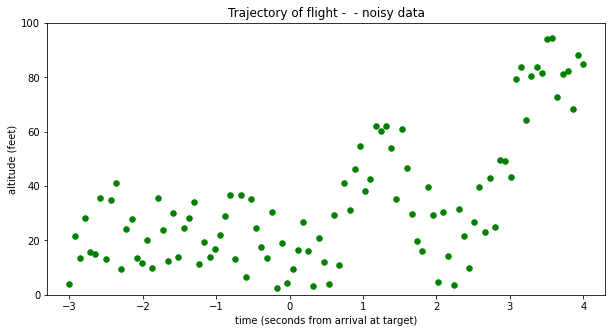

In [43]:
title_suffix = ' - noisy data'
graph(in_array, noisy_data, title_suffix, scatter=True, solid_line=False)

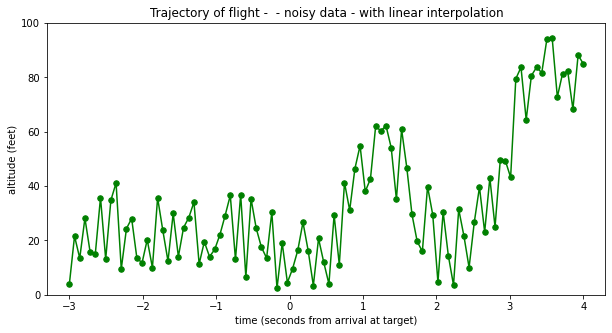

In [65]:
title_suffix =  ' - noisy data'+ ' - with linear interpolation'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=True)

In [46]:

m, b = np.polyfit(in_array, noisy_data, 1)

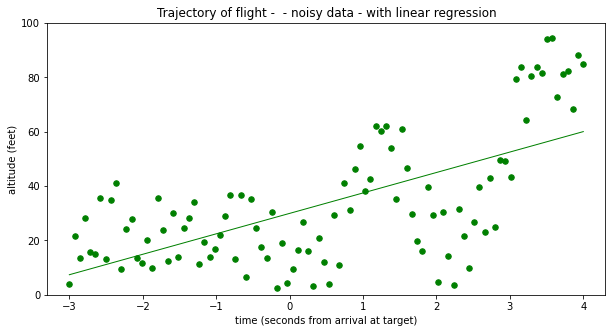

In [48]:
title_suffix =  ' - noisy data'+ ' - with linear regression'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(in_array, m*x+b)]) 

In [68]:
# custom_title = title + ' - noisy data' + ' - 3rd dgr polynomial regression'

x_min, x_max = -3.3, 4.3
from numpy.polynomial import polynomial as P
z = np.polyfit(in_array, noisy_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)


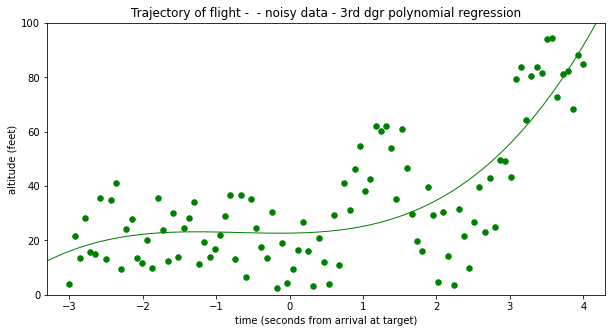

In [69]:
title_suffix = ' - noisy data'+ ' - 3rd dgr polynomial regression'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

In [71]:

z = np.polyfit(in_array, noisy_data, 20)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)


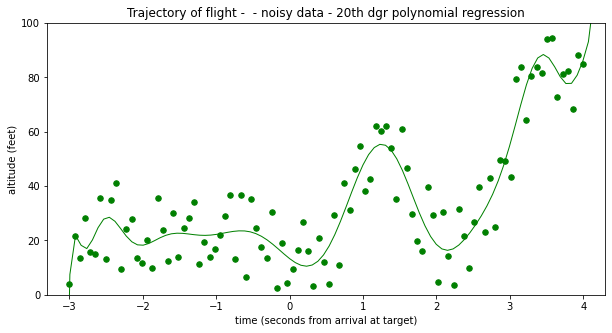

In [72]:
title_suffix = ' - noisy data'+ ' - 20th dgr polynomial regression'
graph(in_array, noisy_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))]) 

In [53]:
import pandas as pd

noisy_data_series = pd.Series(noisy_data)
mvg_avg_by_3 = noisy_data_series.rolling(3).mean()
mvg_avg_by_5 = noisy_data_series.rolling(5).mean()
mvg_avg_by_7 = noisy_data_series.rolling(7).mean()
mvg_avg_by_10 = noisy_data_series.rolling(10).mean()

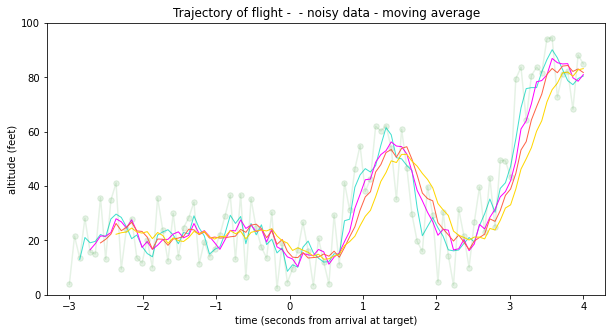

In [55]:
increments = [3, 5, 7, 10]
mvg_avg_list = [ (in_array, noisy_data_series.rolling(inc).mean()) for inc in increments ]
title_suffix = ' - noisy data'+ ' - moving average'
graph(in_array, noisy_data, title_suffix, scatter=True, solid_line=True, line_viz = mvg_avg_list) 

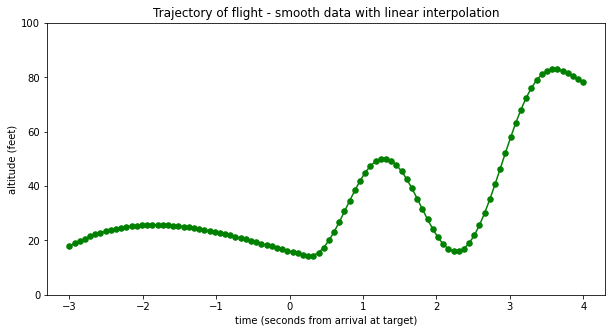

In [56]:
graph(in_array, curve, 'smooth data' + ' with linear interpolation', scatter=True, solid_line=True)

### Make multiple versions of this graph as scatter plots
1. Sparse with most points randomly ommitted
2. Dense and noisy: Many random points above and below like a flock
3. Idiealized: show the one as above, with even points

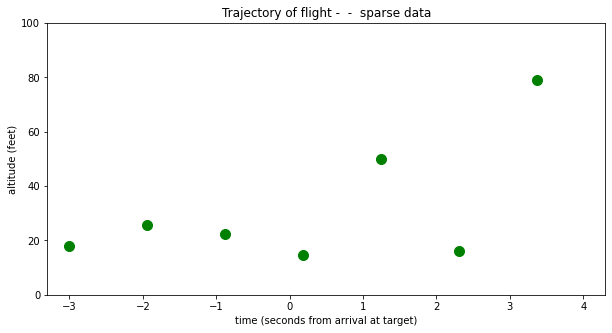

In [74]:
title_suffix = ' -  sparse data'
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = None) 

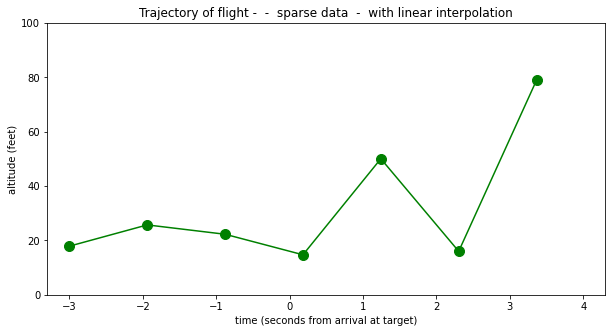

In [75]:
title_suffix = ' -  sparse data'+ '  -  with linear interpolation'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=True, line_viz = None) 

In [76]:
# custom_title = title + ' - sparse data' + ' -  with linear regression'

# m, b = np.polyfit(sparse_input, sparse_data, 1)

# plt.figure(figsize=figure_proportions) 
# plt.plot(in_array, m*x+b, color = 'green')
# plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 

# plt.title(custom_title) 
# plt.xlabel(x_axis_label) 
# plt.ylabel(y_axis_label) 
# plt.xlim(x_min, x_max )
# plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
# plt.show() 

NameError: name 'title' is not defined

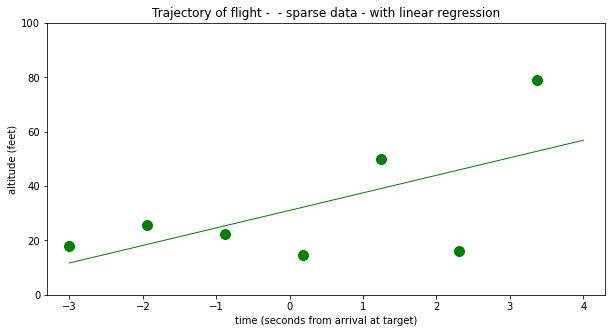

In [80]:
m, b = np.polyfit(sparse_input, sparse_data, 1)
title_suffix =  ' - sparse data'+ ' - with linear regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(in_array, m*x+b)]) 

In [ ]:
# custom_title = title + '  – sparse data' + ' - 3rd dgr polynomial regression'

# z = np.polyfit(sparse_input, sparse_data, 3)
# p = np.poly1d(z)
# xp = np.linspace(x_min, x_max, 100)

# plt.figure(figsize=figure_proportions)

# plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
# plt.plot(xp, p(xp), color = 'green')
# plt.title(custom_title) 
# plt.xlabel(x_axis_label) 
# plt.ylabel(y_axis_label) 
# plt.xlim(x_min, x_max )
# plt.ylim(0, y_max )
# plt.savefig('viz/'+custom_title+'.svg')
# plt.show() 

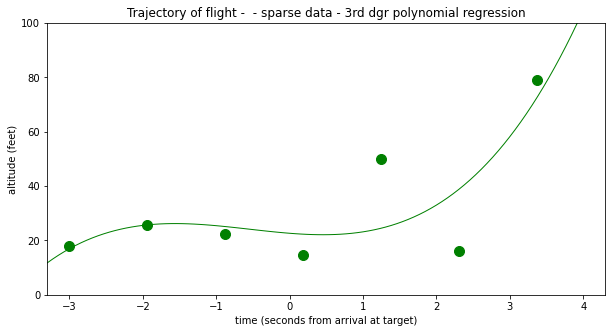

In [81]:


z = np.polyfit(sparse_input, sparse_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - sparse data'+ ' - 3rd dgr polynomial regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

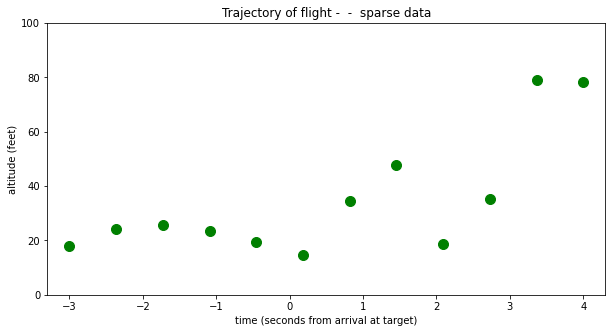

In [104]:
sampling_increment = 9
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]
title_suffix = ' -  sparse data'
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=False, line_viz = None) 

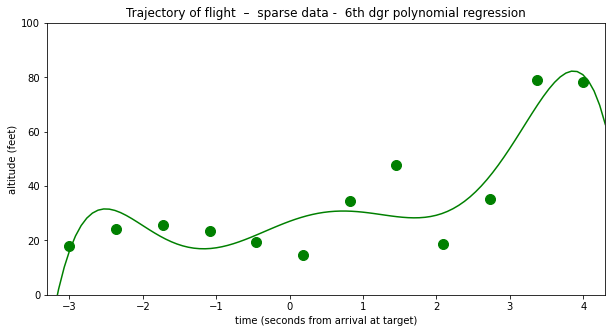

In [105]:
figure_proportions = (10, 5)
title = 'Trajectory of flight'
custom_title = title + '  –  sparse data' + ' -  6th dgr polynomial regression'

z = np.polyfit(sparse_input, sparse_data, 6)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

plt.figure(figsize=figure_proportions)
plt.title(custom_title) 
y_axis_label = 'altitude (feet)'
x_axis_label = 'time (seconds from arrival at target)'
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )

y_max=100
plt.ylim(0, y_max )
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(xp, p(xp), color = 'green')


plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

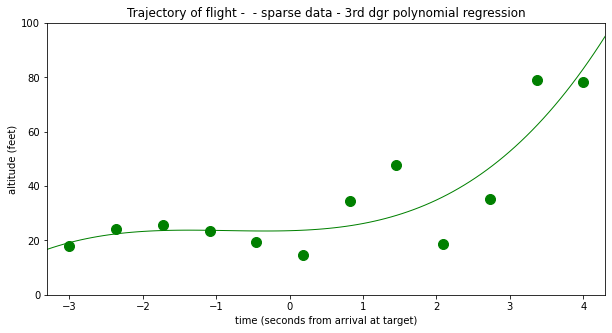

In [106]:
z = np.polyfit(sparse_input, sparse_data, 3)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - sparse data'+ ' - 3rd dgr polynomial regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

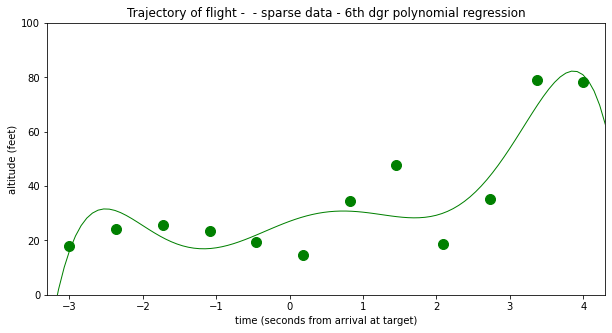

In [107]:
z = np.polyfit(sparse_input, sparse_data, 6)
p = np.poly1d(z)
xp = np.linspace(x_min, x_max, 100)

title_suffix = ' - sparse data'+ ' - 6th dgr polynomial regression'
graph(sparse_input, sparse_data,  title_suffix, scatter=True, solid_line=False, line_viz = [(xp, p(xp))])

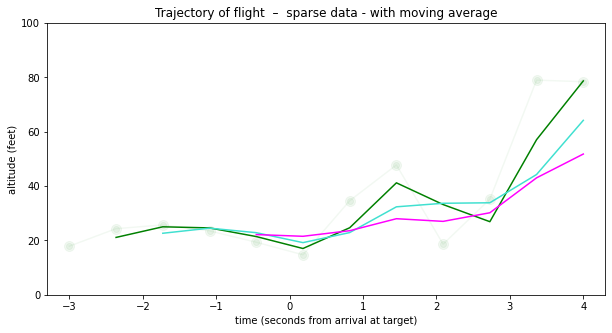

In [110]:
custom_title = title + '  –  sparse data - with moving average'

sparse_data_series = pd.Series(sparse_data)
mvg_avg_by_2 = sparse_data_series.rolling(2).mean()
mvg_avg_by_3 = sparse_data_series.rolling(3).mean()
mvg_avg_by_5 = sparse_data_series.rolling(5).mean()


plt.figure(figsize=figure_proportions)


plt.plot(sparse_input, sparse_data, color = 'green', marker = "o", alpha=.05)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100, alpha=.05) 

plt.plot(sparse_input, mvg_avg_by_2, color = 'green') 
plt.plot(sparse_input, mvg_avg_by_3, color = 'turquoise') 
plt.plot(sparse_input, mvg_avg_by_5, color = 'magenta') 

plt.title(custom_title) 

plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show()

In [111]:
sampling_increment = 9
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]

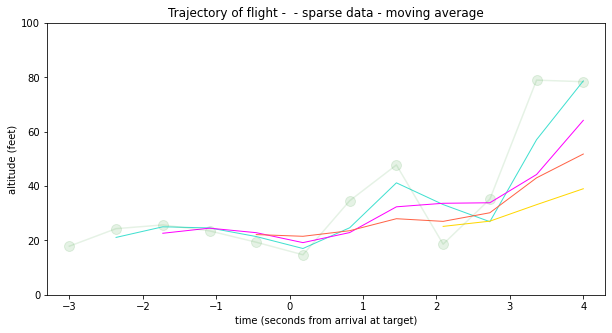

In [117]:
increments = [2, 3, 5, 9]
sparse_data_series = pd.Series(sparse_data)

mvg_avg_list = [ (sparse_input, sparse_data_series.rolling(inc).mean()) for inc in increments ]
title_suffix = ' - sparse data'+ ' - moving average'
graph(sparse_input, sparse_data, title_suffix, scatter=True, solid_line=True, line_viz = mvg_avg_list) 

Show line graphs for 1 and 2 to see how they are inadequate

Possibly discuss doing a polynomial regression

### Explain and demonstrate Lowess (Locally weighted ...)

show what can go wrong when applying to this to the sparse situation

<Figure size 720x360 with 0 Axes>

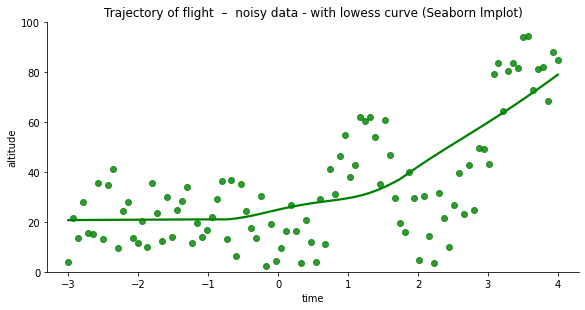

In [118]:
custom_title = title + '  –  noisy data' + ' - with lowess curve (Seaborn lmplot)'

import seaborn as sns
import pandas as pd

plt.figure(figsize=figure_proportions)
plot_df = pd.DataFrame({'time': in_array, 'altitude': noisy_data})

g=sns.lmplot(x='time', y='altitude', data=plot_df, \
             lowess=True, scatter_kws={'color': 'green'}, line_kws={'color': 'green'},\
             height = figure_proportions[1]*.8, aspect = figure_proportions[0]/figure_proportions[1]);
g.set(title=custom_title)
g.set(ylim=(0, y_max))
g.set(xlim=(x_min, x_max))
g.savefig('viz/'+custom_title+'.svg')

<Figure size 720x360 with 0 Axes>

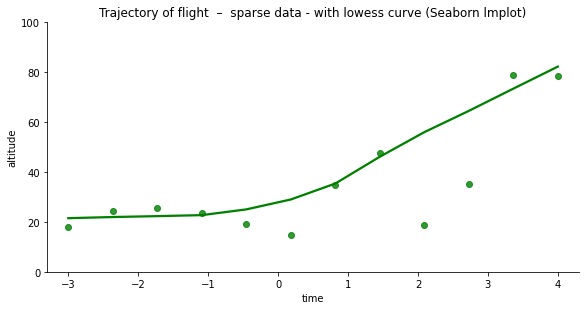

In [114]:
custom_title = title + '  –  sparse data' + ' - with lowess curve (Seaborn lmplot)'

import seaborn as sns
import pandas as pd

plt.figure(figsize=figure_proportions)
plot_df = pd.DataFrame({'time': sparse_input, 'altitude': sparse_data})

g=sns.lmplot(x='time', y='altitude', data=plot_df, \
             lowess=True, truncate=True, scatter_kws={'color': 'green'}, line_kws={'color': 'green'},\
             height = figure_proportions[1]*.8, aspect = figure_proportions[0]/figure_proportions[1]);
g.set(title=custom_title)
g.set(ylim=(0, y_max))
g.set(xlim=(x_min, x_max))
g.savefig('viz/'+custom_title+'.svg')

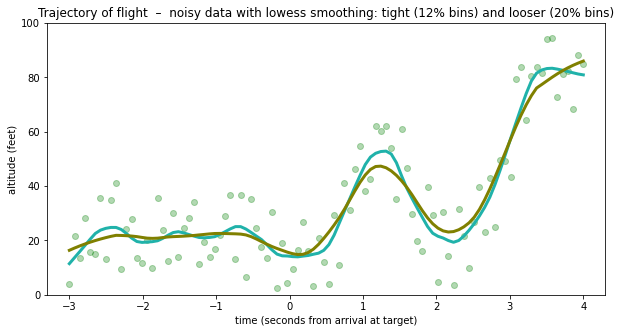

In [122]:
custom_title = title + '  –  noisy data' + ' with lowess smoothing: tight (12% bins) and looser (20% bins)'
from statsmodels.nonparametric.smoothers_lowess import lowess

lowess_tight = lowess(noisy_data, in_array, frac = .12)
lowess_loose = lowess(noisy_data, in_array, frac = .2)

plt.figure(figsize=figure_proportions)

plt.scatter(in_array, noisy_data, color = 'green', marker = "o", alpha=.3)
plt.plot(lowess_tight[:,0], lowess_tight[:,1], color = 'lightseagreen', lw=3)
plt.plot(lowess_loose[:,0],  lowess_loose[:,1], color = 'olive', lw=3)

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 



In [123]:
lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]), (lowess_loose[:,0], lowess_loose[:,1]) ]
len(lowess_list)

2

LENGTH OF LINE VIZ IS 2
0
1


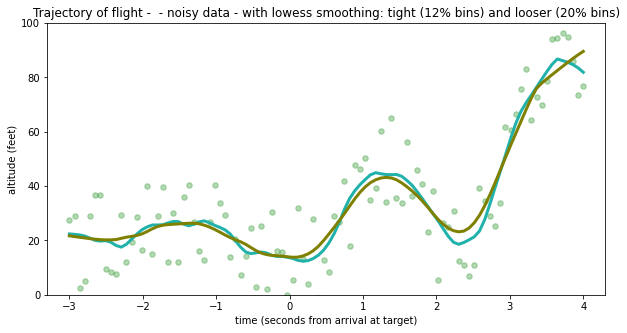

In [124]:
graph(in_array, noisy_data,  ' - noisy data'+ ' - with lowess smoothing: tight (12% bins) and looser (20% bins)', scatter=True, solid_line=False, line_viz = lowess_list)

In [125]:
sampling_increment = 15
sparse_input = in_array[::sampling_increment]
sparse_data = curve[::sampling_increment]

compare to `moving average`

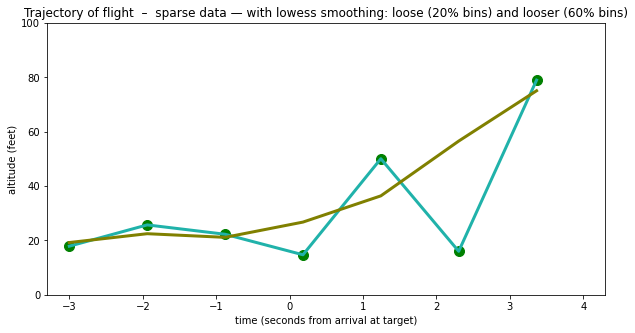

In [126]:
custom_title = title + '  –  sparse data' +   ' — with lowess smoothing: loose (20% bins) and looser (60% bins)'

lowess_tight = lowess(sparse_data, sparse_input, frac = .20)
lowess_loose = lowess(sparse_data, sparse_input, frac = .60)

plt.figure(figsize=figure_proportions)

plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(sparse_input, lowess_tight[:,1], color = 'lightseagreen', lw=3)
plt.plot(sparse_input,  lowess_loose[:,1], color = 'olive', lw=3)

plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

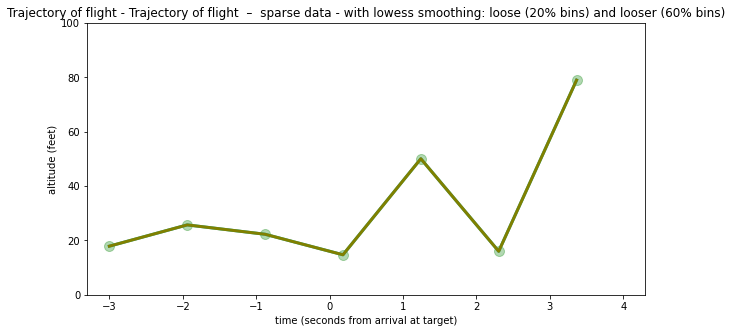

In [134]:
custom_title = title + '  –  sparse data' +   ' - with lowess smoothing: loose (20% bins) and looser (60% bins)'

lowess_tight = lowess(sparse_data, sparse_input, frac = .20)
lowess_loose = lowess(sparse_data, sparse_input, frac = .55)
lowess_list = [(lowess_tight[:,0], lowess_tight[:,1]), (lowess_loose[:,0], lowess_loose[:,1]) ]

graph(sparse_input, sparse_data,  custom_title, scatter=True, solid_line=False, line_viz = lowess_list)


### Explain and demonstrate spline
piecewise polynomial (usually cubic)

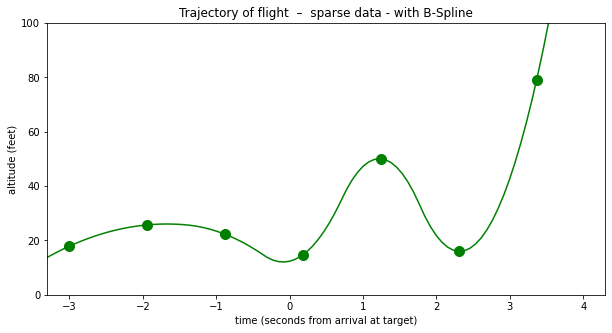

In [45]:
custom_title = title + '  –  sparse data' +   ' - with B-Spline'
import scipy

x_interp = np.linspace(x_min, x_max, 100)
BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)

plt.figure(figsize=figure_proportions)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 


In [46]:
sampling_increment = 9
sparse_input = in_array[::sampling_increment]
sparse_data =     curve[::sampling_increment]

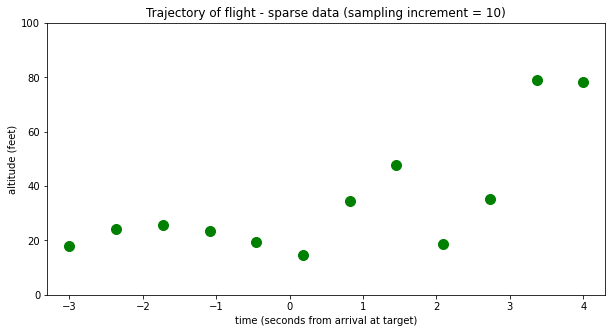

In [47]:
custom_title = title + ' - sparse data (sampling increment = 10)'

plt.figure(figsize=figure_proportions) 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

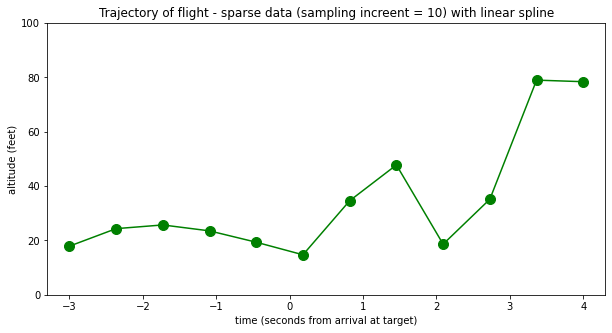

In [48]:
custom_title = title + ' - sparse data (sampling increent = 10) with linear spline'

plt.figure(figsize=figure_proportions) 
plt.plot(sparse_input, sparse_data, color = 'green', marker = "o") 
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100) 
plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

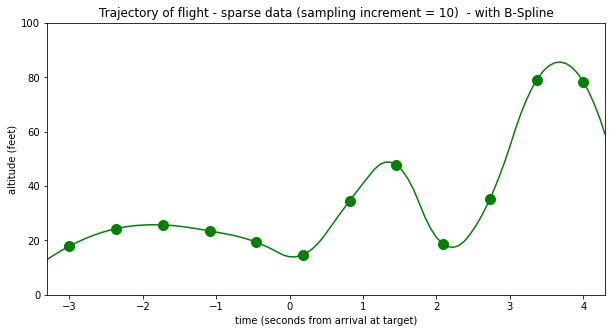

In [49]:
custom_title = title + ' - sparse data (sampling increment = 10) '+   ' - with B-Spline'

BSpline = scipy.interpolate.make_interp_spline(sparse_input, sparse_data, 2)
y_BSpline = BSpline(x_interp)


plt.figure(figsize=figure_proportions)
plt.scatter(sparse_input, sparse_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 

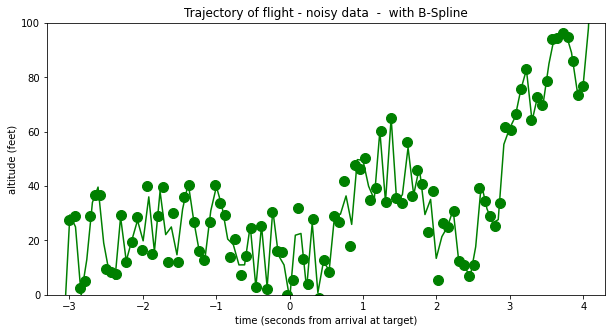

In [50]:
custom_title = title + ' - noisy data '+   ' -  with B-Spline'

BSpline = scipy.interpolate.make_interp_spline(in_array, noisy_data, 2)
y_BSpline = BSpline(x_interp)


plt.figure(figsize=figure_proportions)
plt.scatter(in_array, noisy_data, color = 'green', marker = "o", s=100)
plt.plot(x_interp, y_BSpline, color='green')



plt.title(custom_title) 
plt.xlabel(x_axis_label) 
plt.ylabel(y_axis_label) 
plt.xlim(x_min, x_max )
plt.ylim(0, y_max )
plt.savefig('viz/'+custom_title+'.svg')
plt.show() 